In [1]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
vocabulary_size = 2000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

17465344/17464789 [==============================] - 2s 0us/step
Loaded dataset with 25000 training samples, 25000 test samples


Print Sample Review and its Label

In [3]:
print('---review---')
print(X_train[6])
print('---label---')
print(y_train[6])

---review---
[1, 2, 365, 1234, 5, 1156, 354, 11, 14, 2, 2, 7, 1016, 2, 2, 356, 44, 4, 1349, 500, 746, 5, 200, 4, 2, 11, 2, 2, 1117, 1831, 2, 5, 2, 26, 6, 2, 2, 17, 369, 37, 215, 1345, 143, 2, 5, 1838, 8, 1974, 15, 36, 119, 257, 85, 52, 486, 9, 6, 2, 2, 63, 271, 6, 196, 96, 949, 2, 4, 2, 7, 4, 2, 2, 819, 63, 47, 77, 2, 180, 6, 227, 11, 94, 2, 2, 13, 423, 4, 168, 7, 4, 22, 5, 89, 665, 71, 270, 56, 5, 13, 197, 12, 161, 2, 99, 76, 23, 2, 7, 419, 665, 40, 91, 85, 108, 7, 4, 2, 5, 2, 81, 55, 52, 1901]
---label---
1


Note that the review is stored as a sequence of integers. These are word IDs that have been pre-assigned to individual words, and the label is an integer (0 for negative, 1 for positive).
We can use the dictionary returned by imdb.get_word_index() to map the review back to the original words.

In [4]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in X_train[6]])
print('---label---')
print(y_train[6])

1646592/1641221 [==============================] - 1s 1us/step
---review with words---
['the', 'and', 'full', 'involving', 'to', 'impressive', 'boring', 'this', 'as', 'and', 'and', 'br', 'villain', 'and', 'and', 'need', 'has', 'of', 'costumes', 'b', 'message', 'to', 'may', 'of', 'and', 'this', 'and', 'and', 'concept', 'issue', 'and', 'to', 'and', 'he', 'is', 'and', 'and', 'movie', 'women', 'like', "isn't", 'surely', "i'm", 'and', 'to', 'toward', 'in', "here's", 'for', 'from', 'did', 'having', 'because', 'very', 'quality', 'it', 'is', 'and', 'and', 'really', 'book', 'is', 'both', 'too', 'worked', 'and', 'of', 'and', 'br', 'of', 'and', 'and', 'figure', 'really', 'there', 'will', 'and', 'things', 'is', 'far', 'this', 'make', 'and', 'and', 'was', "couldn't", 'of', 'few', 'br', 'of', 'you', 'to', "don't", 'female', 'than', 'place', 'she', 'to', 'was', 'between', 'that', 'nothing', 'and', 'movies', 'get', 'are', 'and', 'br', 'yes', 'female', 'just', 'its', 'because', 'many', 'br', 'of', 'and

In [5]:
print('Maximum review length: {}'.format(len(max((X_train + X_test), key=len))))
print('Minimum review length: {}'.format(len(min((X_test + X_test), key=len))))

Maximum review length: 2697
Minimum review length: 14


In order to feed this data into our RNN, all input documents must have the same length. We will limit the maximum review length to max_words by truncating longer reviews and padding shorter reviews with a null value (0). We can accomplish this using the pad_sequences() function in Keras. For now, set max_words to 500.

In [0]:
from keras.preprocessing import sequence
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [7]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(input_dim=vocabulary_size, output_dim=embedding_vector_length, input_length=max_words))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           64000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               8448      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 81,025
Trainable params: 81,025
Non-trainable params: 0
__________________________________________________

In [8]:
train_history = model.fit(X_train, y_train, batch_size=32,
                          epochs=10, verbose=2,
                          validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 - 147s - loss: 0.4197 - accuracy: 0.7953 - val_loss: 0.3582 - val_accuracy: 0.8536
Epoch 2/10
 - 149s - loss: 0.3161 - accuracy: 0.8705 - val_loss: 0.3350 - val_accuracy: 0.8696
Epoch 3/10
 - 149s - loss: 0.2843 - accuracy: 0.8855 - val_loss: 0.3311 - val_accuracy: 0.8574
Epoch 4/10
 - 149s - loss: 0.2667 - accuracy: 0.8929 - val_loss: 0.3352 - val_accuracy: 0.8736
Epoch 5/10
 - 148s - loss: 0.2504 - accuracy: 0.9011 - val_loss: 0.3218 - val_accuracy: 0.8682
Epoch 6/10
 - 148s - loss: 0.2224 - accuracy: 0.9143 - val_loss: 0.3338 - val_accuracy: 0.8684
Epoch 7/10
 - 148s - loss: 0.2110 - accuracy: 0.9162 - val_loss: 0.3492 - val_accuracy: 0.8712
Epoch 8/10
 - 148s - loss: 0.1948 - accuracy: 0.9250 - val_loss: 0.3332 - val_accuracy: 0.8606
Epoch 9/10
 - 147s - loss: 0.2035 - accuracy: 0.9201 - val_loss: 0.3714 - val_accuracy: 0.8542
Epoch 10/10
 - 148s - loss: 0.1997 - accuracy: 0.9216 - val_loss: 0.3605 - val_accuracy: 0.8714


In [0]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

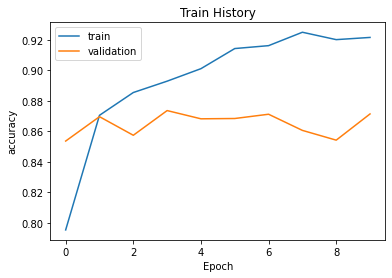

In [10]:
show_train_history(train_history,'accuracy','val_accuracy')

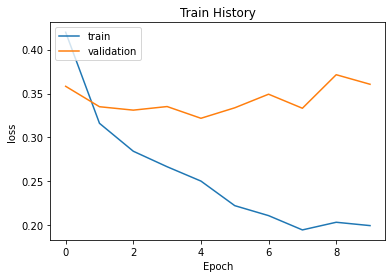

In [11]:
show_train_history(train_history,'loss','val_loss')

Model Evaluation

In [12]:
scores = model.evaluate(X_test, y_test, verbose=1)
scores[1]

25000/25000 [==============================] - 29s 1ms/step


0.8736000061035156

Predict Test Data

In [0]:
predict=model.predict_classes(X_test)
predict_classes=predict.reshape(len(X_test))

In [0]:
def get_original_text(i):
    word_to_id = imdb.get_word_index()
    word_to_id = {k:(v+3) for k,v in word_to_id.items()}
    word_to_id["<PAD>"] = 0
    word_to_id["<START>"] = 1
    word_to_id["<UNK>"] = 2

    id_to_word = {value:key for key,value in word_to_id.items()}
    return ' '.join(id_to_word[id] for id in X_test[i])

In [0]:
SentimentDict={1:'positive', 0:'negative'}
def display_test_sentiment(i):
    print(get_original_text(i))
    print('label: ', SentimentDict[y_test[i]], ', prediction: ', SentimentDict[predict_classes[i]])

In [16]:
display_test_sentiment(3)

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

In [17]:
display_test_sentiment(13000)

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD